<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

pn.extension('plotly')
pd.options.display.max_columns = 300

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

**Selección de bases:** En cuanto a los años seleccionados, se omiten 2020 y 2021 porque por el cambio de método de enseñanza de presencial a virtual dada la pandemia, se puede haber visto afectada la calidad educativa y/o el acompañamiento de preparación para la presentación del examen.  Se cargan los archivos correspondientes al periodo 2018-1 hasta 2019-2.

La columna "ESTU_PILOPAGA" o "ESTU_GENERACION-E" que tienen los archivos de 2018 y 2019 respectivamente, se revisa la información de la variable y toda viene informada "NO", por lo que se descarta previo a la unificación de las bases.

In [2]:
datos20171 = pd.read_csv("Archivos/SB11_20171.txt", sep = "¬")
datos20181 = pd.read_csv("Archivos/SB11_20181.txt", sep = "¬")
datos20191 = pd.read_csv("Archivos/SB11_20191.txt", sep = "¬")

datos20181.drop(datos20181.columns[-1], axis = 1, inplace = True) 
datos20191.drop(datos20191.columns[-1], axis = 1, inplace = True) 

PruebasSaber11 = datos20191.append(datos20181.append(datos20171, ignore_index = True), ignore_index = True)

print("Filas: {}".format(PruebasSaber11.shape[0]))
print("Columnas: {}".format(PruebasSaber11.shape[1]))

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Filas: 46603
Columnas: 81


**Diccionario** https://www.icfes.gov.co/documents/20143/1885630/6.+Diccionario+Saber11+2019-1+a+2019-2.pdf

A partir del diccionario anterior se seleccionan las variables de interés.  Al revisar la documentación de la base de datos se evidencia el campo **ESTU_ESTADOINVESTIGACION** que indica si la prueba se encuentra en un estado válido para el ICFES o si hubo problemas para validar la identidad de la persona que la presentó; en este sentido, se dedice no solo seleccionar las variables de interés, sino filtrar de la base los registros no validos (se mantienen solo los registros con estado 'PUBLICAR').

In [3]:
df_final = PruebasSaber11[PruebasSaber11['ESTU_ESTADOINVESTIGACION'] == 'PUBLICAR'][[
    "PERIODO",
    "ESTU_GENERO",
    "ESTU_ESTUDIANTE",
    "ESTU_TIENEETNIA",
    "ESTU_DEPTO_RESIDE",
    "ESTU_MCPIO_RESIDE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_TIENEINTERNET",
    "FAMI_NUMLIBROS",
    "FAMI_COMELECHEDERIVADOS",
    "FAMI_COMECARNEPESCADOHUEVO",
    "FAMI_COMECEREALFRUTOSLEGUMBRE",
    "ESTU_HORASSEMANATRABAJA",
    "COLE_NATURALEZA",
    "COLE_CALENDARIO",
    "COLE_BILINGUE",
    "COLE_CARACTER",
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES",
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]]

En total, se seleccionaron 30 variables del documento inicial, incluyendo el periodo.  Esto ya que es posible que algunas caractarísticas permitan mejores diferenciaciones si las relacionamos con la fecha de presentación del examen (cambios en perfil con le tiempo).  Dependiendo de los análisis posteriores, se pretende crear una variable de EDUCACION_PADRES y tomar de allí el nivel de formación más alto entre el de la madre y el padre.

#### Análisis de Datos Faltantes

In [4]:
# Hallamos el porcentaje de datos faltantes con respecto al total para cada variable.
filas = df_final.shape[0]
# Porcentaje de datos faltantes por columna.
df_final.isnull().sum() / filas

PERIODO                          0.000000
ESTU_GENERO                      0.000000
ESTU_ESTUDIANTE                  0.000000
ESTU_TIENEETNIA                  0.000388
ESTU_DEPTO_RESIDE                0.000367
ESTU_MCPIO_RESIDE                0.000367
FAMI_ESTRATOVIVIENDA             0.048206
FAMI_EDUCACIONMADRE              0.045035
FAMI_EDUCACIONPADRE              0.045639
FAMI_TIENEINTERNET               0.045919
FAMI_NUMLIBROS                   0.054115
FAMI_COMELECHEDERIVADOS          0.049607
FAMI_COMECARNEPESCADOHUEVO       0.047602
FAMI_COMECEREALFRUTOSLEGUMBRE    0.047709
ESTU_HORASSEMANATRABAJA          0.030563
COLE_NATURALEZA                  0.000000
COLE_CALENDARIO                  0.000000
COLE_BILINGUE                    0.146148
COLE_CARACTER                    0.038564
PERCENTIL_LECTURA_CRITICA        0.000000
PERCENTIL_MATEMATICAS            0.000000
PERCENTIL_C_NATURALES            0.000000
PERCENTIL_SOCIALES_CIUDADANAS    0.000000
PERCENTIL_INGLES                 0

La variable con mayor porcentaje de datos faltantes es *COLE_BILINGUE*; a excepción de esta, se tiene una proporción de faltantes que no supera el 3,2% de la variable. Por practicidad del ejercicio, y teniendo en cuenta el volumen de datos disponibles, se toma la decisión de eliminarlos del ejercicio.

In [5]:
df_final = df_final.dropna()
eliminados = filas - df_final.shape[0]
print("Se han eliminado {} datos, correspondientes al {}%. {} datos restantes."
      .format(eliminados, eliminados/filas * 100, df_final.shape[0]))

Se han eliminado 10345 datos, correspondientes al 22.31257009748943%. 36019 datos restantes.


#### Descripción de las variables numéricas.

In [6]:
# Puntajes
puntajes = df_final.drop([
    "PERIODO",
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES"
], axis = 1)
puntajes.describe()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,36019.000000,36019.000000,36019.000000,36019.000000,36019.000000,36019.000000
mean,62.020017,61.794969,60.793720,59.991616,67.600738,308.231628
std,10.497879,13.110186,11.977341,12.849792,16.549194,57.140600
min,21.000000,16.000000,23.000000,18.000000,0.000000,123.000000
25%,55.000000,53.000000,53.000000,52.000000,56.000000,270.000000
50%,63.000000,63.000000,62.000000,62.000000,70.000000,317.000000
75%,70.000000,71.000000,69.000000,69.000000,81.000000,352.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,476.000000


#### Descripción de las variables categóricas
Excluimos las variables "MCPIO_RESIDE" y "DEPTO_RESIDE"

In [7]:
categoricas = df_final.drop([
    "PERIODO",
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES",
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL",
    "ESTU_MCPIO_RESIDE",
    "ESTU_DEPTO_RESIDE",
], axis = 1)
for columna in categoricas:
    print("{}: {}".format(columna, sorted(df_final[columna].unique())))

ESTU_GENERO: ['F', 'M']
ESTU_ESTUDIANTE: ['ESTUDIANTE']
ESTU_TIENEETNIA: ['No', 'Si']
FAMI_ESTRATOVIVIENDA: ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato']
FAMI_EDUCACIONMADRE: ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno', 'No Aplica', 'No sabe', 'Postgrado', 'Primaria completa', 'Primaria incompleta', 'Secundaria (Bachillerato) completa', 'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa', 'Técnica o tecnológica incompleta']
FAMI_EDUCACIONPADRE: ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno', 'No Aplica', 'No sabe', 'Postgrado', 'Primaria completa', 'Primaria incompleta', 'Secundaria (Bachillerato) completa', 'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa', 'Técnica o tecnológica incompleta']
FAMI_TIENEINTERNET: ['No', 'Si']
FAMI_NUMLIBROS: ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS']
FAMI_COME

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

#### Matriz de correlación y Gráfico de pares

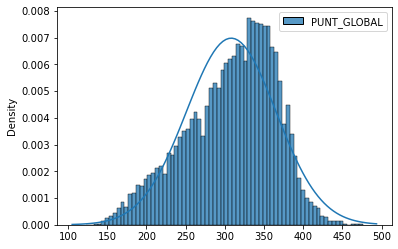

In [8]:
x = df_final[['PUNT_GLOBAL']]
ax = sns.histplot(x, stat='density')
mu, std = stats.norm.fit(x)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

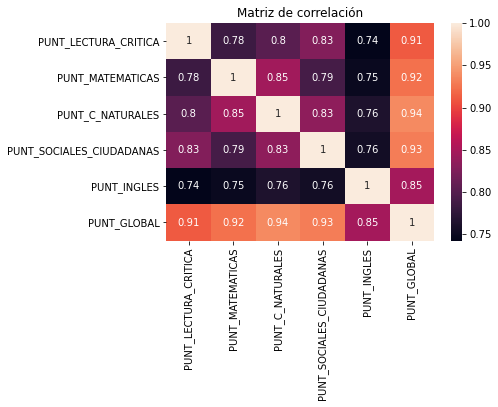

In [9]:
correlacion = df_final[[
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL",
    "ESTU_GENERO"
]]

sns.heatmap(correlacion.corr(), annot=True)
plt.title('Matriz de correlación');

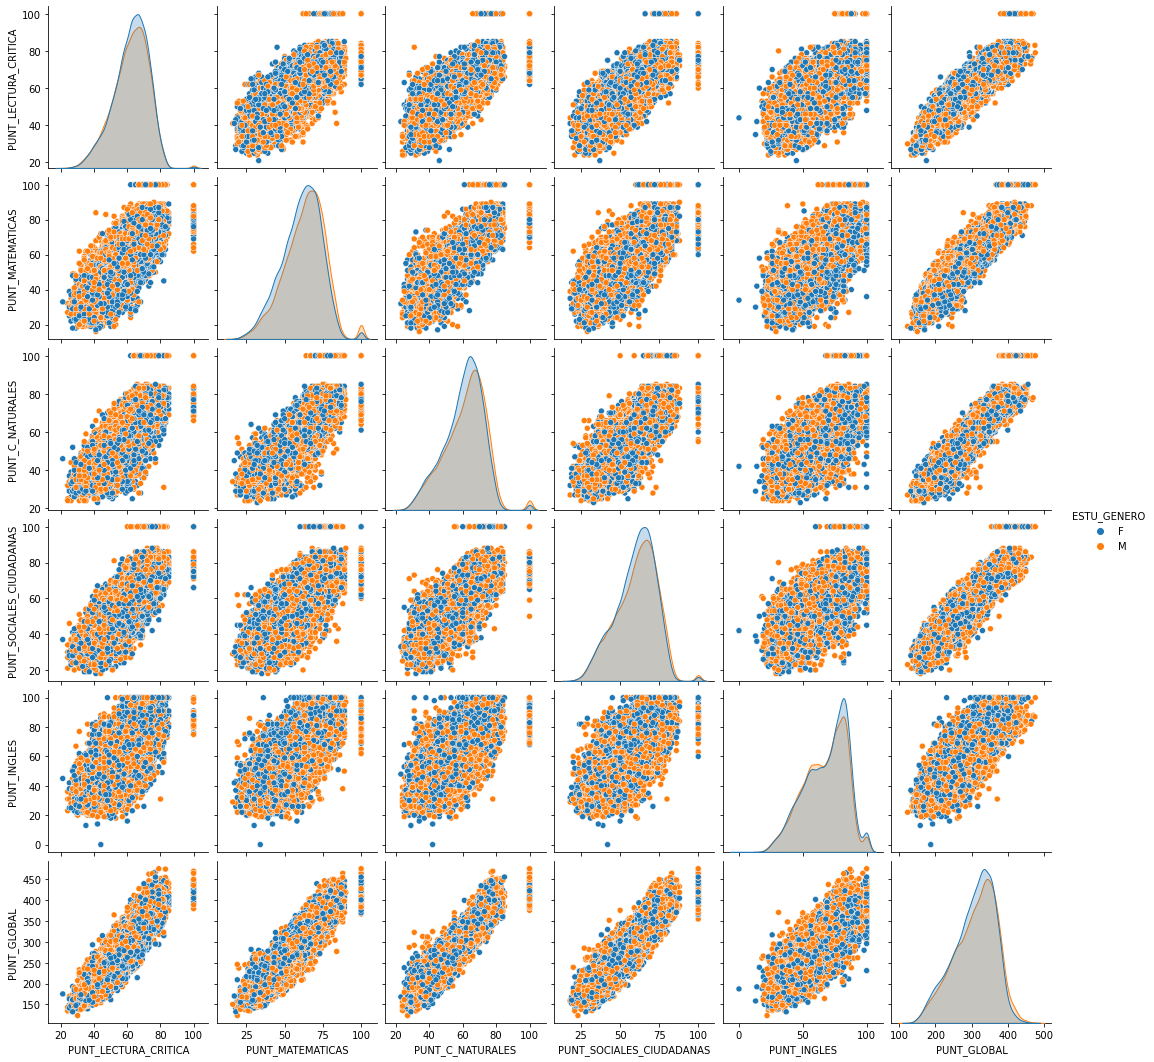

In [10]:
sns.pairplot(correlacion, hue="ESTU_GENERO")

El gráfico de correlación por pares abierto por el género del estudiante indica una leve concentración de los puntajes de las mujeres niveles inferiores, pero no refleja diferencias que pudieran ser significativas.  Esto se corrobora en el siguiente gráfico de violín.

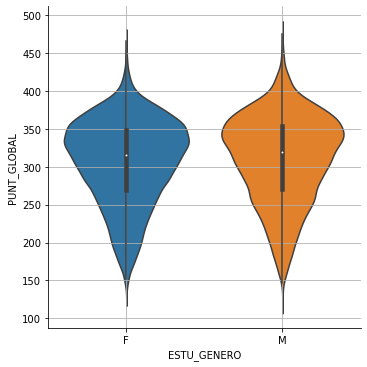

In [11]:
def graficarCatPlot(x):
    sns.catplot(x = x, y = "PUNT_GLOBAL", data = df_final, kind = "violin")
    plt.grid()

graficarCatPlot("ESTU_GENERO")

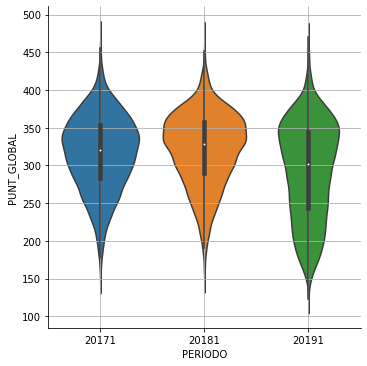

In [12]:
graficarCatPlot("PERIODO")

El periodo no parece reflejar diferencias importantes en los puntajes. No obstante, observamos que los puntajes de la prueba del periodo 2019-1 son más dispersos y con cola a la izquierda.

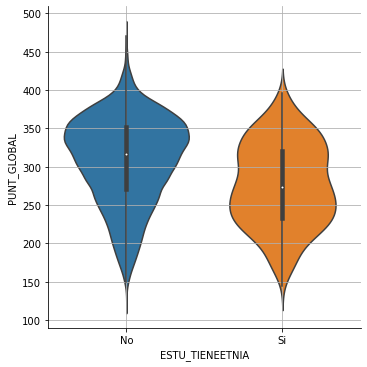

In [13]:
graficarCatPlot("ESTU_TIENEETNIA")

El gráfico nos muestra que el hecho de pertenecer a una etnia minoritaria tiene algún tipo de correlación con el puntaje total de la prueba, teniendo mayor concentración en puntajes más bajos.

<AxesSubplot:xlabel='ESTU_DEPTO_RESIDE', ylabel='PUNT_GLOBAL'>

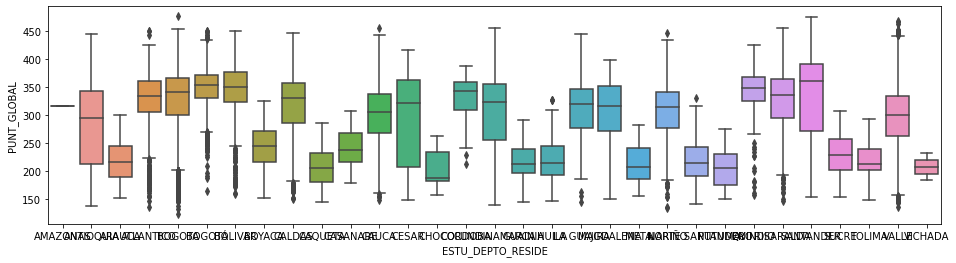

In [14]:
plt.figure(figsize=(16,4))
sns.boxplot(x = "ESTU_DEPTO_RESIDE", y = "PUNT_GLOBAL", data = df_final, order = sorted(df_final["ESTU_DEPTO_RESIDE"].unique()))

El departamento de origen influye en el resultado de la prueba.

In [15]:
ciudades_principales = [ 'ARMENIA', 'BARRANQUILLA', 'BOGOTÁ D.C.', 'BUCARAMANGA', 'BUENAVENTURA', 'CALI', 'CARTAGENA DE INDIAS',
 'CARTAGENA', 'CÚCUTA', 'MANIZALES', 'MEDELLIN', 'MEDELLÍN', 'MONTERIA', 'MONTERÍA','NEIVA', 'PASTO', 'PEREIRA', 'POPAYAN', 'POPAYÁN',
 'RIOHACHA', 'SANTA MARTA', 'SINCELEJO', 'VALLEDUPAR', 'VILLAVICENCIO']

def ciudad(row):
    if row['ESTU_MCPIO_RESIDE'] in ciudades_principales:
        return 'SI'
    else:
        return 'NO'

df_final["CIUDAD_PRINCIPAL"] = df_final.apply(lambda row: ciudad(row), axis = 1)

Se crea una variable que clasifica la ciudad de residencia del alumno entre "Ciudades Principales" y "Resto" ya que se asume puede ser significativa para explicar el resultado de la prueba.

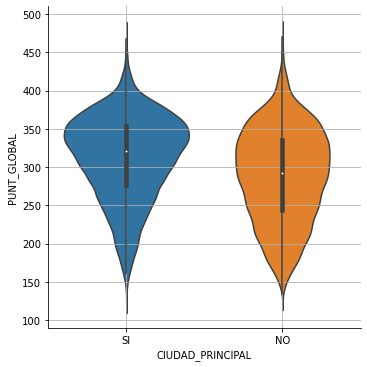

In [16]:
graficarCatPlot("CIUDAD_PRINCIPAL")

El gráfico anterior evidencia que existe un comportamiento diferencial dependiendo del tipo de ciudad, los municipios clasificados como "Ciudades Principales" concentran su distribución en puntajes más altos.

<AxesSubplot:xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PUNT_GLOBAL'>

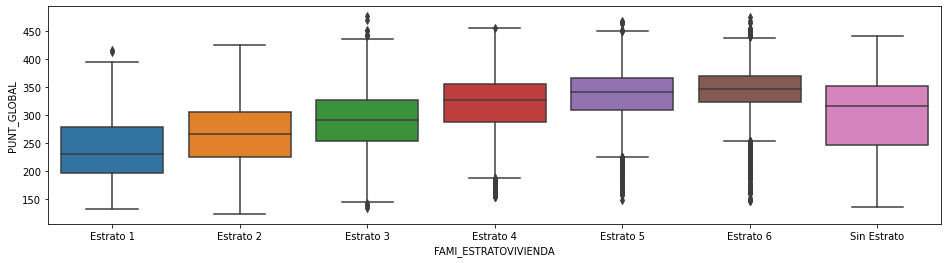

In [17]:
plt.figure(figsize=(16,4))
sns.boxplot(x = "FAMI_ESTRATOVIVIENDA", y = "PUNT_GLOBAL", data = df_final, order = sorted(df_final["FAMI_ESTRATOVIVIENDA"].unique()))

El estrato es una variable significativa, y se evidencian comportamientos bien diferenciados entre los estratos, por lo que no se realiza ninguna recategorización.

Se asume que los padres del hogar van a propender porque su hij@ alcance un nivel educativo superior la máximo nivel alcancado por cualquiera de los dos; por eso, se decide construir una variable que asuma el mayor nivel de educación alcanzado por cualquiera de los padres para incorporarla en el modelo.

In [18]:
a_numero = {'Ninguno': 0, 
            'Primaria incompleta': 1, 
            'Primaria completa': 2, 
            'Secundaria (Bachillerato) incompleta': 3, 
            'Secundaria (Bachillerato) completa': 4, 
            'Técnica o tecnológica incompleta': 5, 
            'Técnica o tecnológica completa': 6, 
            'Educación profesional incompleta': 7, 
            'Educación profesional completa': 8, 
            'Postgrado': 9, 
            'No Aplica': -1, 
            'No sabe': -1 }

def trad_edu(row):
    padre = a_numero[row["FAMI_EDUCACIONPADRE"]]
    madre = a_numero[row["FAMI_EDUCACIONMADRE"]]
    
    if padre> madre:
        return str(padre)
    else:
        return str(madre)

df_final["MAX_EDU_PADRES"] = df_final.apply(lambda row: trad_edu(row), axis = 1)

<AxesSubplot:xlabel='MAX_EDU_PADRES', ylabel='PUNT_GLOBAL'>

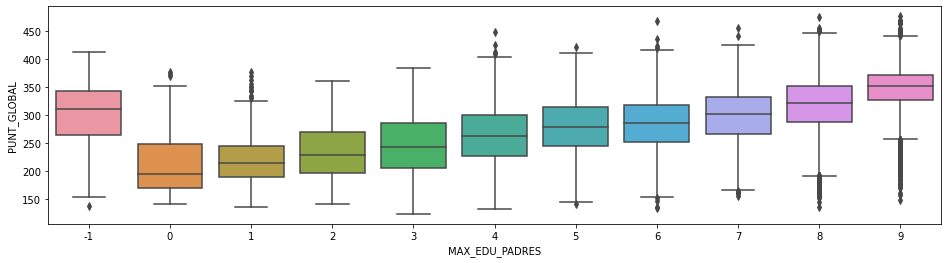

In [19]:
plt.figure(figsize=(16,4))
sns.boxplot(x = "MAX_EDU_PADRES", y = "PUNT_GLOBAL", data = df_final, order = sorted(df_final["MAX_EDU_PADRES"].unique()))

El ordenamiento del máximo nivel educativo alcanzado por alguno de los padres permite evidenciar que es una variable potencialmente discriminante para predecir el resultado de la prueba.

<AxesSubplot:xlabel='FAMI_NUMLIBROS', ylabel='PUNT_GLOBAL'>

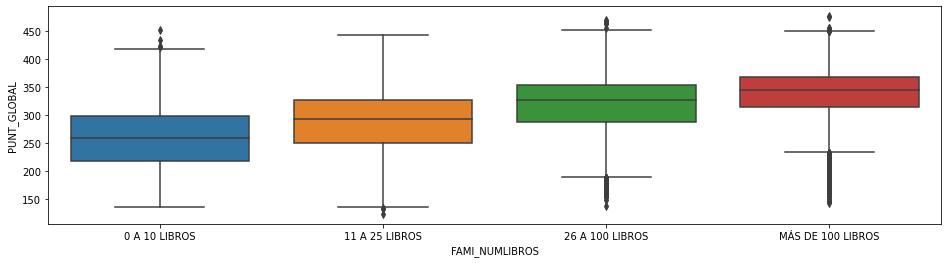

In [20]:
plt.figure(figsize=(16,4))
sns.boxplot(x = "FAMI_NUMLIBROS", y = "PUNT_GLOBAL", data = df_final, order = sorted(df_final["FAMI_NUMLIBROS"].unique()))

La cantidad de libros en el hogar es una variable significativa.

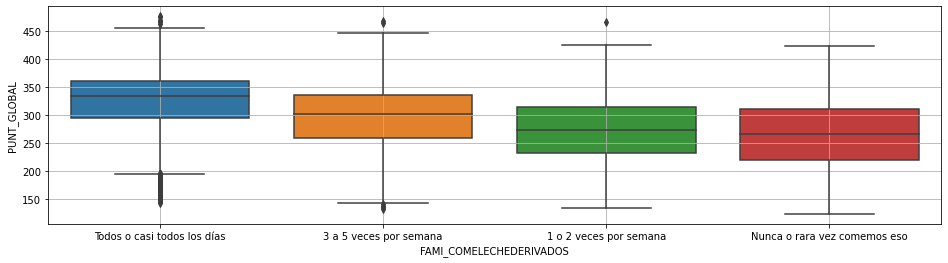

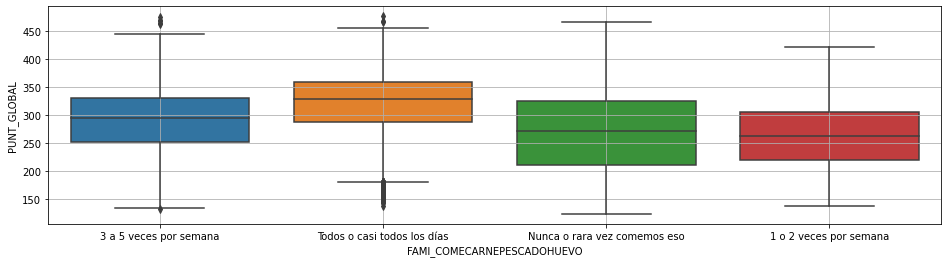

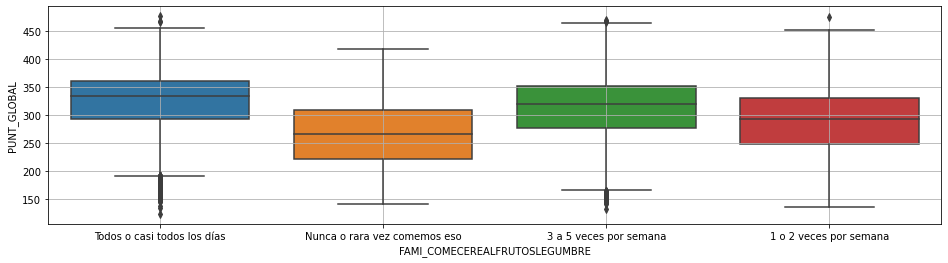

In [21]:
def graficarBoxPlot(x):
    plt.figure(figsize=(16,4))
    sns.boxplot(x = x, y = "PUNT_GLOBAL", data = df_final)
    plt.grid()

graficarBoxPlot("FAMI_COMELECHEDERIVADOS")
graficarBoxPlot("FAMI_COMECARNEPESCADOHUEVO")
graficarBoxPlot("FAMI_COMECEREALFRUTOSLEGUMBRE")

De las variables proxi de la calidad de la alimentación, se evidencia por las gráficas anteriores que si bien hay niveles de puntaje diferentes asociados a la frecuencia con que se consume el tipo de alimento, la única que muestra un ordenamiento lógico del puntaje dada la frecuencia es **FAMI_COMELECHEDERIVADOS**, la cual se considera incorporar en el modelo.

Recategorización de la variable


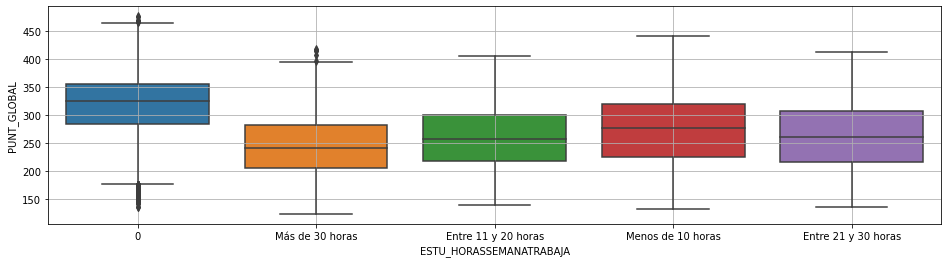

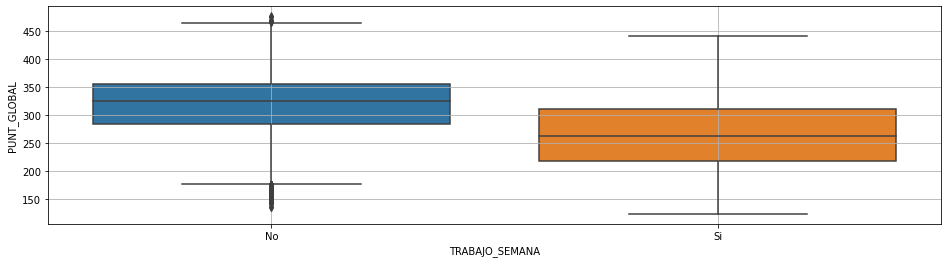

In [22]:
graficarBoxPlot("ESTU_HORASSEMANATRABAJA")

def trabaja(row):
    if row["ESTU_HORASSEMANATRABAJA"] == '0':
        return "No"
    else:
        return "Si"

df_final["TRABAJO_SEMANA"] = df_final.apply(lambda row: trabaja(row), axis = 1)

print("Recategorización de la variable")

graficarBoxPlot("TRABAJO_SEMANA")

Esta variable del número de horas que trabaja la persona que presentó la prueba no discrimina ampliamente en función del número de horas trabajadas, por lo que se realiza una transformación para categorizarla en "Trabajo" Vs "No Trabajo".

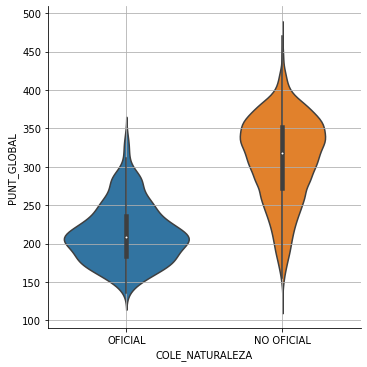

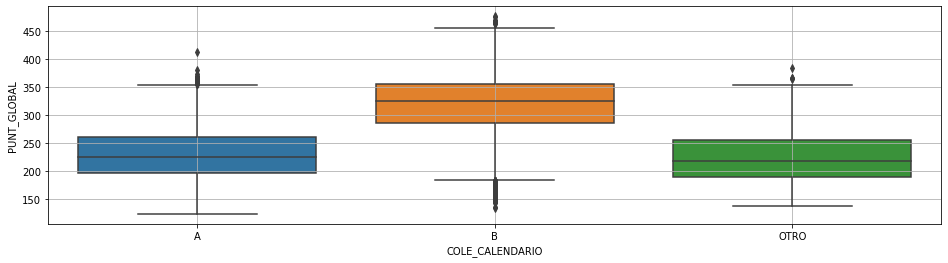

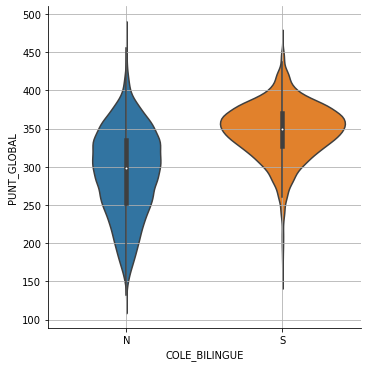

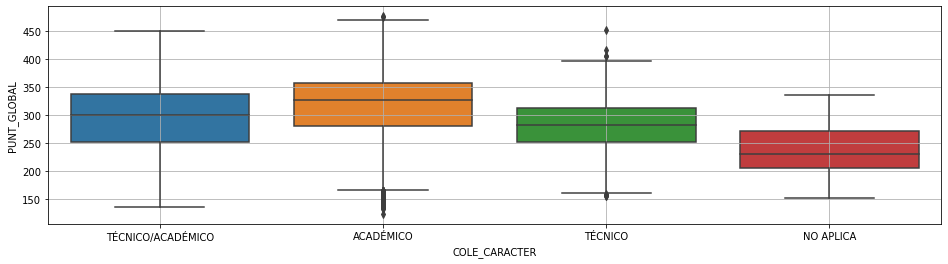

In [23]:
graficarCatPlot("COLE_NATURALEZA")
graficarBoxPlot("COLE_CALENDARIO")
graficarCatPlot("COLE_BILINGUE")
graficarBoxPlot("COLE_CARACTER")

Observamos que las distintas variables asociadas al Colegio también son discriminantes al momento de comparar el puntaje obtenido por los estudiantes.  Se presume que variables como la NATURALEZA y CALENDARIO pueden estar altamente correlacionadas, ya que los colegios Oficiales por lo general no ofrecen Calendario B, por lo que se utiliza la  Matriz de Confusión de Cramér's V:

In [24]:
# Función obtenida de stack-overflow para probar dependencia entre 2 variables categóricas.
def cramers_corrected_stat(dfcolumn1, dfcolumn2):
    confusion_matrix = pd.crosstab(dfcolumn1, dfcolumn2)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
                                               
cramers_corrected_stat(df_final["COLE_NATURALEZA"], df_final["COLE_CALENDARIO"])

0.42316871710681364

Con el resultado de la prueba se comprueba la correlación entre las variables y se decide tomar solo la variable **COLE_NATURALEZA**

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

A partir del análisis gráfico realizado en la misión anterior, estas son las variables que se han determinado como significativas para el modelo: 

ESTU_TIENEETNIA
CIUDAD_PRINCIPAL
FAMI_ESTRATOVIVIENDA
MAX_EDU_PADRES
FAMI_NUMLIBROS
FAMI_COMELECHEDERIVADOS
TRABAJO_SEMANA
COLE_NATURALEZA

Con las variables de percentil posteriormente se va a definir si el estudiante está o no en riesgo.

In [25]:
variables_modelo = ['ESTU_TIENEETNIA',
                    'CIUDAD_PRINCIPAL',
                    'FAMI_ESTRATOVIVIENDA',
                    'MAX_EDU_PADRES',
                    'FAMI_NUMLIBROS',
                    'FAMI_COMELECHEDERIVADOS',
                    'TRABAJO_SEMANA',
                    'COLE_NATURALEZA',
                    'PERCENTIL_LECTURA_CRITICA',
                    'PERCENTIL_MATEMATICAS',
                    'PERCENTIL_C_NATURALES',
                    'PERCENTIL_SOCIALES_CIUDADANAS',
                    'PERCENTIL_INGLES'
                    ]

base_modelo = df_final[variables_modelo]
base_modelo.head()

,ESTU_TIENEETNIA,CIUDAD_PRINCIPAL,FAMI_ESTRATOVIVIENDA,MAX_EDU_PADRES,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,TRABAJO_SEMANA,COLE_NATURALEZA,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES
0,No,SI,Estrato 4,5,0 A 10 LIBROS,Todos o casi todos los días,No,OFICIAL,29,31,33,22,39
1,No,SI,Estrato 3,6,11 A 25 LIBROS,3 a 5 veces por semana,No,OFICIAL,35,25,27,10,10
2,No,SI,Estrato 2,8,0 A 10 LIBROS,3 a 5 veces por semana,Si,OFICIAL,54,38,27,23,32
3,No,SI,Estrato 2,8,0 A 10 LIBROS,1 o 2 veces por semana,Si,OFICIAL,41,43,30,29,55
4,No,SI,Estrato 6,8,MÁS DE 100 LIBROS,Todos o casi todos los días,No,NO OFICIAL,40,73,38,34,64


Ahora transformamos las variables categóricas de forma que puedan ser utilizadas en un modelo numérico. Para esto utilizamos one hot encoding, y eliminamos el primer nivel para cada variable categórica.

In [26]:
base_modelo = pd.get_dummies(base_modelo, drop_first = True)
base_modelo.columns

Index(['PERCENTIL_LECTURA_CRITICA', 'PERCENTIL_MATEMATICAS',
       'PERCENTIL_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'PERCENTIL_INGLES', 'ESTU_TIENEETNIA_Si', 'CIUDAD_PRINCIPAL_SI',
       'FAMI_ESTRATOVIVIENDA_Estrato 2', 'FAMI_ESTRATOVIVIENDA_Estrato 3',
       'FAMI_ESTRATOVIVIENDA_Estrato 4', 'FAMI_ESTRATOVIVIENDA_Estrato 5',
       'FAMI_ESTRATOVIVIENDA_Estrato 6', 'FAMI_ESTRATOVIVIENDA_Sin Estrato',
       'MAX_EDU_PADRES_0', 'MAX_EDU_PADRES_1', 'MAX_EDU_PADRES_2',
       'MAX_EDU_PADRES_3', 'MAX_EDU_PADRES_4', 'MAX_EDU_PADRES_5',
       'MAX_EDU_PADRES_6', 'MAX_EDU_PADRES_7', 'MAX_EDU_PADRES_8',
       'MAX_EDU_PADRES_9', 'FAMI_NUMLIBROS_11 A 25 LIBROS',
       'FAMI_NUMLIBROS_26 A 100 LIBROS', 'FAMI_NUMLIBROS_MÁS DE 100 LIBROS',
       'FAMI_COMELECHEDERIVADOS_3 a 5 veces por semana',
       'FAMI_COMELECHEDERIVADOS_Nunca o rara vez comemos eso',
       'FAMI_COMELECHEDERIVADOS_Todos o casi todos los días',
       'TRABAJO_SEMANA_Si', 'COLE_NATURALEZA_OFICIAL'],

In [27]:
base_modelo.head()

,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,ESTU_TIENEETNIA_Si,CIUDAD_PRINCIPAL_SI,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,MAX_EDU_PADRES_0,MAX_EDU_PADRES_1,MAX_EDU_PADRES_2,MAX_EDU_PADRES_3,MAX_EDU_PADRES_4,MAX_EDU_PADRES_5,MAX_EDU_PADRES_6,MAX_EDU_PADRES_7,MAX_EDU_PADRES_8,MAX_EDU_PADRES_9,FAMI_NUMLIBROS_11 A 25 LIBROS,FAMI_NUMLIBROS_26 A 100 LIBROS,FAMI_NUMLIBROS_MÁS DE 100 LIBROS,FAMI_COMELECHEDERIVADOS_3 a 5 veces por semana,FAMI_COMELECHEDERIVADOS_Nunca o rara vez comemos eso,FAMI_COMELECHEDERIVADOS_Todos o casi todos los días,TRABAJO_SEMANA_Si,COLE_NATURALEZA_OFICIAL
0,29,31,33,22,39,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,35,25,27,10,10,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,54,38,27,23,32,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
3,41,43,30,29,55,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,40,73,38,34,64,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


Para poder responder si un estudiante puede estar o no en riesgo, primero debemos definir el riesgo. Para este caso, usaremos el percentil 80. Esto efectivamente nos permite transformar la variable objetivo a una variable binaria (está o no en riesgo) por lo cual podemos usar un modelo de clasificación.

Los modelos de clasificación más conocidos son RandomForestClassifier y LogisticRegression. Veremos como se comportan el uno contra el otro para este caso.

In [28]:
percentil = 65

def riesgo(row):
    riesgo = 0
    if row['PERCENTIL_LECTURA_CRITICA'] < percentil:
        riesgo += 1
    if row['PERCENTIL_MATEMATICAS'] < percentil:
        riesgo += 1
    if row['PERCENTIL_C_NATURALES'] < percentil:
        riesgo += 1
    if row['PERCENTIL_SOCIALES_CIUDADANAS'] < percentil:
        riesgo += 1
    if row['PERCENTIL_INGLES'] < percentil:
        riesgo += 1
        
    if riesgo >= 3:
        return 1
    else:
        return 0
    
base_modelo["ESTU_RIESGO"] = base_modelo.apply(lambda row: riesgo(row), axis = 1)

In [29]:
# Solo ejecutar 1 vez

variables_percentiles = ['PERCENTIL_LECTURA_CRITICA',
'PERCENTIL_MATEMATICAS',
'PERCENTIL_C_NATURALES',
'PERCENTIL_SOCIALES_CIUDADANAS',
'PERCENTIL_INGLES']

base_modelo_1 = base_modelo.drop(variables_percentiles, axis = 1)
base_modelo_1.head()

,ESTU_TIENEETNIA_Si,CIUDAD_PRINCIPAL_SI,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,MAX_EDU_PADRES_0,MAX_EDU_PADRES_1,MAX_EDU_PADRES_2,MAX_EDU_PADRES_3,MAX_EDU_PADRES_4,MAX_EDU_PADRES_5,MAX_EDU_PADRES_6,MAX_EDU_PADRES_7,MAX_EDU_PADRES_8,MAX_EDU_PADRES_9,FAMI_NUMLIBROS_11 A 25 LIBROS,FAMI_NUMLIBROS_26 A 100 LIBROS,FAMI_NUMLIBROS_MÁS DE 100 LIBROS,FAMI_COMELECHEDERIVADOS_3 a 5 veces por semana,FAMI_COMELECHEDERIVADOS_Nunca o rara vez comemos eso,FAMI_COMELECHEDERIVADOS_Todos o casi todos los días,TRABAJO_SEMANA_Si,COLE_NATURALEZA_OFICIAL,ESTU_RIESGO
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1


Proporción de estudiantes en riesgo.

In [30]:
base_modelo_1.groupby(['ESTU_RIESGO']).size()

ESTU_RIESGO
0    17944
1    18075
dtype: int64

In [31]:
X = base_modelo_1.drop(["ESTU_RIESGO"], axis = 1)
y = base_modelo_1["ESTU_RIESGO"]

# Dividimos los datos del modelo manteniendo la proporción de estudiantes en riesgo tanto para el
# entrenamiento como para las pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

Regresión Logística

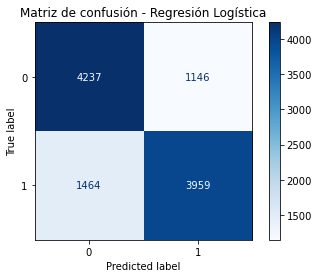

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Matriz de confusión
matrix = plot_confusion_matrix(lr, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('Matriz de confusión - Regresión Logística')
plt.show(matrix)
plt.show()

In [33]:
# True negative
TN = 4237
# False negative
FN = 1464
# False Positive
FP = 1146
# True Positive
TP = 3959

f1_score = TP/(TP + (FP + FN)/2)
print("F1 Score - Regresión Logística: {}".format(f1_score))

F1 Score - Regresión Logística: 0.7520896656534954


Vemos que las matrices de confusión para ambos casos tienen un comportamiento casi idéntico. El F1 score de los modelos es aceptable. El resultado es bastante bueno, lo cual se comprueba realizando una curva ROC y comparando los AUC.

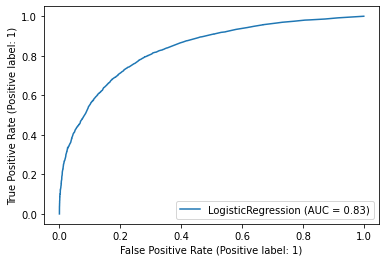

In [34]:
ax = plt.gca()
lr_disp = plot_roc_curve(lr, X_test, y_test, ax=ax)
plt.show()

La regresión logística tiene una ligera ventaja con respecto al random forest, ambos con un AUC de 0.81, pero con un F1 score ligeramente mayor. Para fines prácticos, ambos modelos tienen un desempeño idéndico y bastante aceptable para usar como predictores del riesgo de un estudiante en la prueba Saber 11.

Este resultado ratifica el análisis realizado en la preselección de variables, las cuales realmente pueden llegar a explicar el riesgo según las condiciones socio-económicas del estudiante.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Dado que todas las variables presentes en el modelo son variables categóricas, podemos jugar con las diferentes combinaciones entre estas y ver cómo se afectan los puntajes, las variables dependientes.

In [35]:
variables_panel = ['PUNT_LECTURA_CRITICA',
                   'PUNT_MATEMATICAS',
                   'PUNT_C_NATURALES',
                   'PUNT_SOCIALES_CIUDADANAS',
                   'PUNT_INGLES',
                   'PUNT_GLOBAL',
                   'PERIODO',
                   'ESTU_GENERO',
                   'ESTU_MCPIO_RESIDE',
                   'CIUDAD_PRINCIPAL',
                   'ESTU_DEPTO_RESIDE',
                   'ESTU_TIENEETNIA',
                   'FAMI_ESTRATOVIVIENDA', 
                   'MAX_EDU_PADRES', 
                   'FAMI_NUMLIBROS', 
                   'FAMI_COMELECHEDERIVADOS', 
                   'TRABAJO_SEMANA', 
                   'COLE_NATURALEZA', 
                   'COLE_BILINGUE', 
                   'COLE_CARACTER',
                   'PERCENTIL_LECTURA_CRITICA',
                   'PERCENTIL_MATEMATICAS',
                   'PERCENTIL_C_NATURALES',
                   'PERCENTIL_SOCIALES_CIUDADANAS',
                   'PERCENTIL_INGLES'
                  ]

puntajes = ['PUNT_LECTURA_CRITICA',
            'PUNT_MATEMATICAS',
            'PUNT_C_NATURALES',
            'PUNT_SOCIALES_CIUDADANAS',
            'PUNT_INGLES',
            'PUNT_GLOBAL',
            'ESTU_RIESGO']

base_panel = df_final[variables_panel].copy()
base_panel["ESTU_RIESGO"] = base_panel.apply(lambda row: riesgo(row), axis = 1)
base_panel["PERIODO"] = base_panel['PERIODO'].apply(str)
base_panel.head()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERIODO,ESTU_GENERO,ESTU_MCPIO_RESIDE,CIUDAD_PRINCIPAL,ESTU_DEPTO_RESIDE,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,MAX_EDU_PADRES,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,TRABAJO_SEMANA,COLE_NATURALEZA,COLE_BILINGUE,COLE_CARACTER,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,ESTU_RIESGO
0,50,49,47,40,54,235,20191,F,CALI,SI,VALLE,No,Estrato 4,5,0 A 10 LIBROS,Todos o casi todos los días,No,OFICIAL,N,TÉCNICO/ACADÉMICO,29,31,33,22,39,1
1,53,45,44,34,35,217,20191,F,CALI,SI,VALLE,No,Estrato 3,6,11 A 25 LIBROS,3 a 5 veces por semana,No,OFICIAL,N,TÉCNICO/ACADÉMICO,35,25,27,10,10,1
2,60,52,44,41,49,246,20191,M,CALI,SI,VALLE,No,Estrato 2,8,0 A 10 LIBROS,3 a 5 veces por semana,Si,OFICIAL,N,TÉCNICO/ACADÉMICO,54,38,27,23,32,1
3,56,54,46,44,64,255,20191,M,CALI,SI,VALLE,No,Estrato 2,8,0 A 10 LIBROS,1 o 2 veces por semana,Si,OFICIAL,N,TÉCNICO/ACADÉMICO,41,43,30,29,55,1
4,55,67,50,47,71,280,20191,F,BOGOTÁ D.C.,SI,BOGOTA,No,Estrato 6,8,MÁS DE 100 LIBROS,Todos o casi todos los días,No,NO OFICIAL,S,ACADÉMICO,40,73,38,34,64,1


In [36]:
descriptivas_1 = ['ESTU_GENERO',
                  'ESTU_TIENEETNIA',
                  'FAMI_ESTRATOVIVIENDA', 
                  'MAX_EDU_PADRES', 
                  'FAMI_NUMLIBROS', 
                  'FAMI_COMELECHEDERIVADOS', 
                  'TRABAJO_SEMANA', 
                  'CIUDAD_PRINCIPAL'
                ]

descriptivas_2 = ['PERIODO',
                  'ESTU_MCPIO_RESIDE',
                  'ESTU_DEPTO_RESIDE',
                  'COLE_NATURALEZA', 
                  'COLE_BILINGUE', 
                  'COLE_CARACTER'
                 ]

In [37]:
titulo = "# Tablero de control Pruebas Saber 11"

In [38]:
def barras(variable, objetivo):
    conteo = base_panel.groupby(variable).mean().reset_index()
    return px.bar(conteo, x = variable, y = objetivo, color = variable,
                 title = "{} vs {}".format(variable, objetivo))

In [39]:
def violin(variable1, variable2, objetivo):
    return px.violin(base_panel, x=variable1, y=objetivo, color=variable2,
                      title="{} vs {} - Color: {}".format(variable1, objetivo, variable2))

In [40]:
variable1 = pn.widgets.Select(
    name = "Variable 1",
    value = descriptivas_1[0],
    options = descriptivas_1
)

variable2 = pn.widgets.Select(
    name = "Variable 2",
    value = descriptivas_2[0],
    options = descriptivas_2
)

puntaje = pn.widgets.Select(
    name = 'Puntaje/Riesgo',
    value = puntajes[0],
    options = puntajes)

  
@pn.depends(variable1.param.value, puntaje.param.value)
def barras1(variable1, puntaje):
    return barras(variable1, puntaje)

@pn.depends(variable2.param.value, puntaje.param.value)
def barras2(variable2, puntaje):
    return barras(variable2, puntaje)

@pn.depends(variable1.param.value, variable2.param.value, puntaje.param.value)
def violin_1(variable1, variable2, puntaje):
    return violin(variable1, variable2, puntaje)


tablero = pn.Column(pn.Row(titulo),
                    pn.Row(variable1, variable2, puntaje),
                    pn.Row(pn.Card(barras1)),
                    pn.Row(pn.Card(violin_1)),
                    pn.Row(pn.Card(barras2)))

tablero.servable()

Column
    [0] Row
        [0] Markdown(str)
    [1] Row
        [0] Select(name='Variable 1', options=['ESTU_GENERO', ...], value='ESTU_GENERO')
        [1] Select(name='Variable 2', options=['PERIODO', 'ESTU_MCPIO_RE...], value='PERIODO')
        [2] Select(name='Puntaje/Riesgo', options=['PUNT_LECTURA_CRITICA', ...], value='PUNT_LECTURA_CRITICA')
    [2] Row
        [0] Card
            [0] ParamFunction(function)
    [3] Row
        [0] Card
            [0] ParamFunction(function)
    [4] Row
        [0] Card
            [0] ParamFunction(function)

El objetivo del anterior tablero es poder relacionar las variables socio económicas escogidas con los puntajes de la prueba Saber 11. Lo interesante del tablero anterior es que permite elegir qué puntaje observar, incluido el riesgo como se definió en el modelo.

Lo clave del tablero es mostrar el comportamiento de cada puntaje con la diferentes posibles combinaciones de variables. Por un lado, se muestran los gráficos de barras individuales para cada una de las variables permitidas. Por el otro, un violinplot que permite ver la combinación de ambas variables en un solo gráfico. Esto sobre la variable de puntaje escogida, que es la misma para los 3.

In [41]:
tablero.show()

Launching server at http://localhost:43471
